# Figure 4

In [12]:
#### Loads relevant python libraries ####

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import scipy.fftpack as fft
import scipy.ndimage as ndi
import scipy as sp
from PIL import Image

def px_remove(array, x, y):
    """Function to remove hot pixels in STXM images due to synchrotron beam topup events
    Sets hot pixel value to the average value of the 4 nearest pixels."""
    temp = array
    temp[y, x] = (temp[y+1, x] + temp[y-1, x] + temp[y, x+1] + temp[y, x-1])/4
    return temp

# Loading and processing the experimental STXM images

In [2]:
#### Loads Raw Experimental Images ####

# List of scans
scan_nums = ['35mT', '70mT', '80mT', '130mT']

# Prepares a list of images
images = []

# Loads the raw images and stores in the image list
for i in np.arange(0, len(scan_nums), 1):
    raw = np.loadtxt('Exp_' + scan_nums[i] + '.xim')
    images.append(raw)

In [3]:
#### Image 1 Presentation ####

# Removes hot pixels due to synchrotron beam topup events
image1 = px_remove(images[0], 17, 18)
image1 = px_remove(image1, 23, 53)

# The raw images exhibit a background caused by a thickness gradient accross the sample.

# We create a representation of this background by blurring the original image with a Guassian filter.
background1 = sp.ndimage.gaussian_filter(image1, 1.5)

# This background is then subtracted from the original raw data to create an image without the
# background contribution from the thickness gradient, without altering signal from the magnetic 
# contrast.
subtracted = image1 - background1

# Normalises the out-of-plane magnetic contrast to 1.
magnetic1 = (subtracted-np.amin(subtracted)) / np.amax(subtracted)

In [4]:
#### Image 2 Presentation ####
# The image is processed in the same manner as Image 1.

image2 = px_remove(images[1], 68, 30)

background = sp.ndimage.gaussian_filter(image2, 1.5)
subtracted = image2 - background
magnetic2 = (subtracted-np.amin(subtracted))/np.amax(subtracted)

In [5]:
#### Image 3 Presentation ####
# The image is processed in the same manner as Image 1.

image3 = px_remove(images[2], 4, 31)
image3 = px_remove(image3, 51, 34)
image3 = px_remove(image3, 64, 10) 

background = sp.ndimage.gaussian_filter(image3, 1.5)
subtracted = image3 - background
magnetic3=(subtracted-np.amin(subtracted))/np.amax(subtracted)

In [6]:
#### Image 4 Presentation ####
# The image is processed in the same manner as Image 1.

image4 = px_remove(images[3], 11, 12)
image4 = px_remove(image4, 23, 19)
image4 = px_remove(image4, 58, 15)
image4 = px_remove(image4, 63, 34)

background = sp.ndimage.gaussian_filter(image4, 1.5)
a = image4 - background
magnetic4=(a-np.amin(a))/np.amax(a)

# Demonstration of Image Processing

<IPython.core.display.Javascript object>


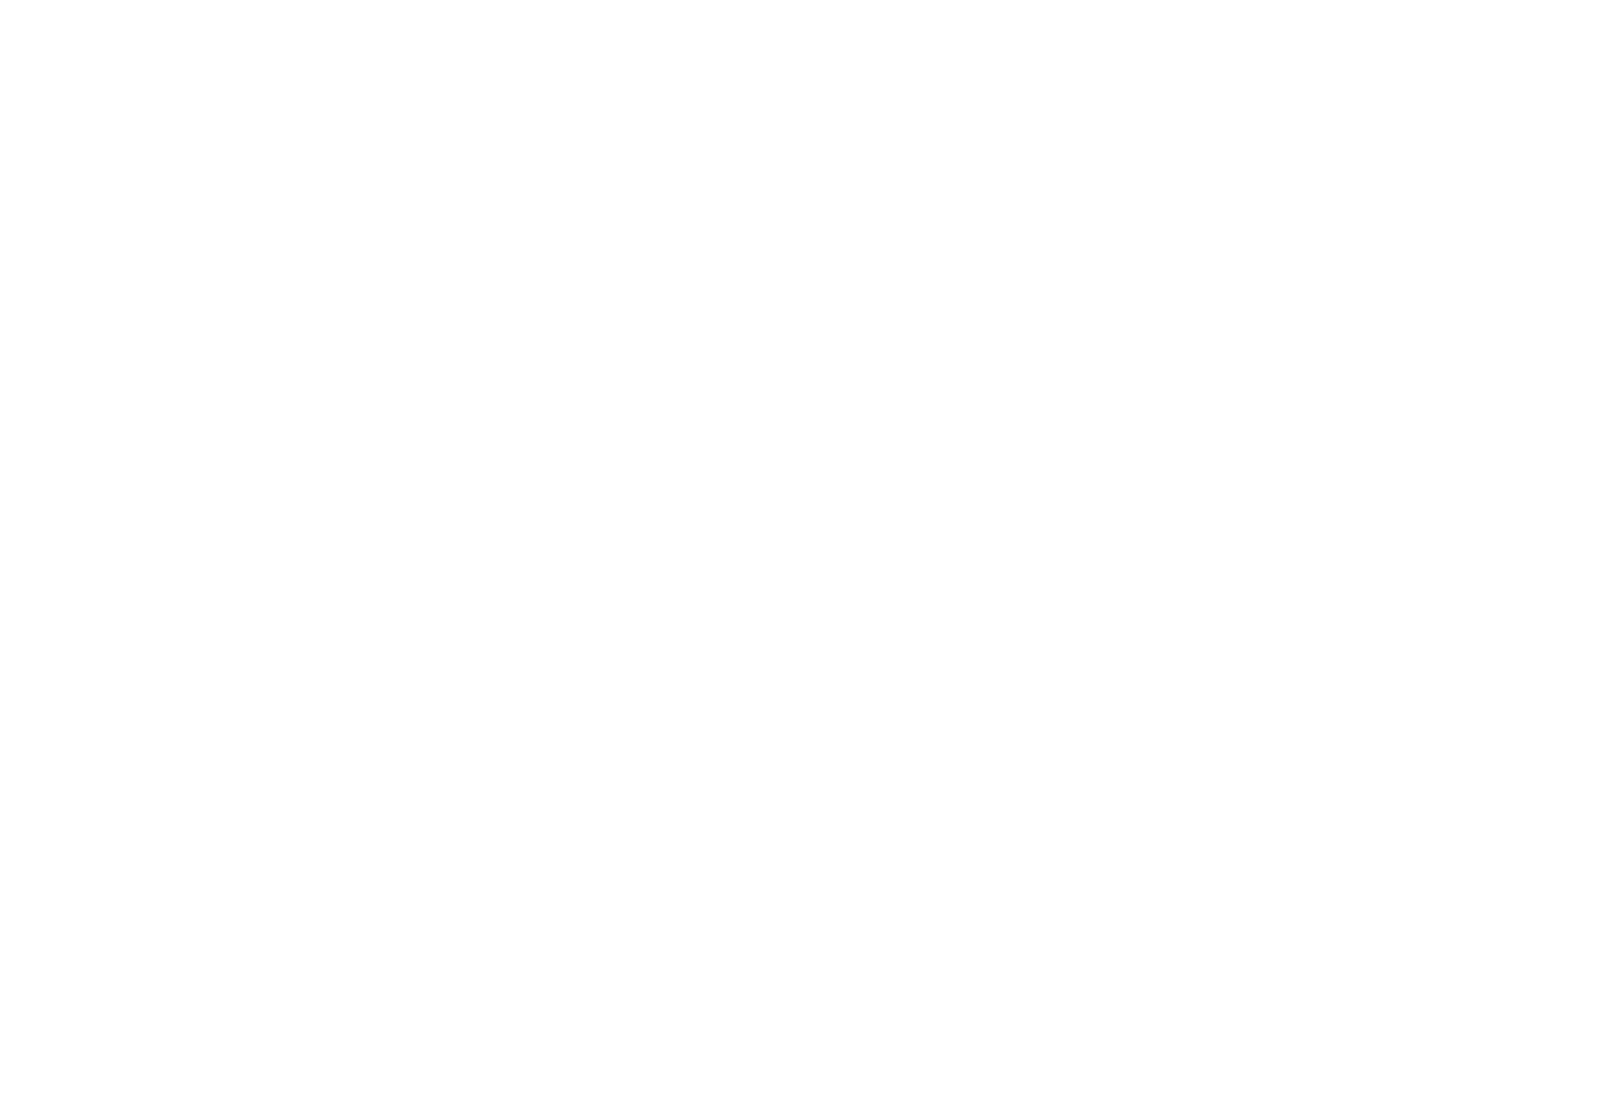

In [7]:
#### Supplementary Fig 4 ####

%matplotlib notebook
plt.figure(figsize=(8, 5.5))

# Sets Gaussian filtering width
x = 0

### Panel 1 ##################
# Plots the oirignal raw data of Image 1
ax1 = plt.subplot2grid((2, 3), (0, 0), rowspan=1,colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(image1[3:-12, 3:-10], x), interpolation='none' ,cmap = 'plasma_r')

# Turns off x and y axis ticks
plt.xticks([])
plt.yticks([])
##############################


### Panel 2 ##################
# Plots the background image achieved by blurring the raw data, effectively mapping the thickness contrast.
ax2 = plt.subplot2grid((2, 3),(0, 1), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(background1[3:-12, 3:-10], x), interpolation='none', cmap = 'plasma_r')
plt.xticks([])
plt.yticks([])
##############################


### Panel 3 ##################
# Plots the background subtracted and normalised image.
ax3 = plt.subplot2grid((2, 3),(0, 2), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(magnetic1[3:-12, 3:-10],x) ,interpolation='none', cmap = 'plasma_r')
plt.xticks([])
plt.yticks([])
##############################


# Sets the Gaussian filter size to 0.5 pixels.
x = 0.5

### Panel 4 ##################
# Plots the Gaussian filtered image.
ax1 = plt.subplot2grid((2, 3),(1, 0), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(magnetic1[3:-12, 3:-10],x), interpolation='none', cmap = 'plasma_r')
plt.xticks([])
plt.yticks([])
##############################


### Panel 5 ##################
# Plots the interpolated image.
ax1 = plt.subplot2grid((2, 3), (1, 1), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(magnetic1[3:-12, 3:-10], x), interpolation='bilinear', cmap = 'plasma_r')
plt.xticks([])
plt.yticks([])
##############################

plt.tight_layout()
plt.show()

#plt.savefig('Fig_Processing.png',dpi=300)

# Loading and producing the limited resolution simulated images

In [8]:
#### Loads Raw Simulated Mz Data Images ####

### Simulation 1 ###
sim1 = np.loadtxt('m_Bz_080_mT.txt') 
sim1 = np.rot90(sim1) #Rotation to match experimental configuration

### Simulation 2 ###
sim2 = np.loadtxt('m_Bz_150_mT_B.txt')
sim2 = np.rot90(sim2)

### Simulation 3 ###
sim3 = np.loadtxt('m_Bz_290_mT.txt')
sim3 = np.rot90(sim3)

In [9]:
#### Creates the limited resolution simulated images ####

### Simulation 1 ###

# Creates an empty array to store the limited resolution image.
res1 = np.zeros((50, 50))
# Loops around each pixel in the limited resolution array.
for i in np.arange(0, 50, 1):
    for j in np.arange(0, 50, 1): 
        pixel = 0
        # Loops around and averages each 5x5 pixel array in the original array.
        for k in np.arange(0, 5, 1):
            for l in np.arange(0, 5), 1:              # XXX, error here?
                pixel =+ sim1[i*5+k, j*5+l]
        # Stores the average value of the 5x5 pixel array to the limited array.
        res1[i, j] = pixel/25

        
### Simulation 2 ###

# Performs the same for Simulation 2
res2 = np.zeros((50, 50))
for i in np.arange(0, 50, 1):
    for j in np.arange(0, 50, 1): 
        pixel = 0
        for k in np.arange(0, 5, 1):
            for l in np.arange(0, 5), 1:              # XXX, same error here?
                pixel =+ sim2[i*5+k, j*5+l]
        res2[i, j] = pixel/25

        
### Simulation 3 ###

# Performs the same for Simulation 3
res3 = np.zeros((50, 50))
for i in np.arange(0, 50, 1):
    for j in np.arange(0, 50, 1): 
        pixel = 0 
        for k in np.arange(0, 5, 1):
            for l in np.arange(0, 5),1:              # XXX, same error here?
                pixel =+ sim3[i*5+k, j*5+l]
        res3[i, j] = pixel/25

<IPython.core.display.Javascript object>


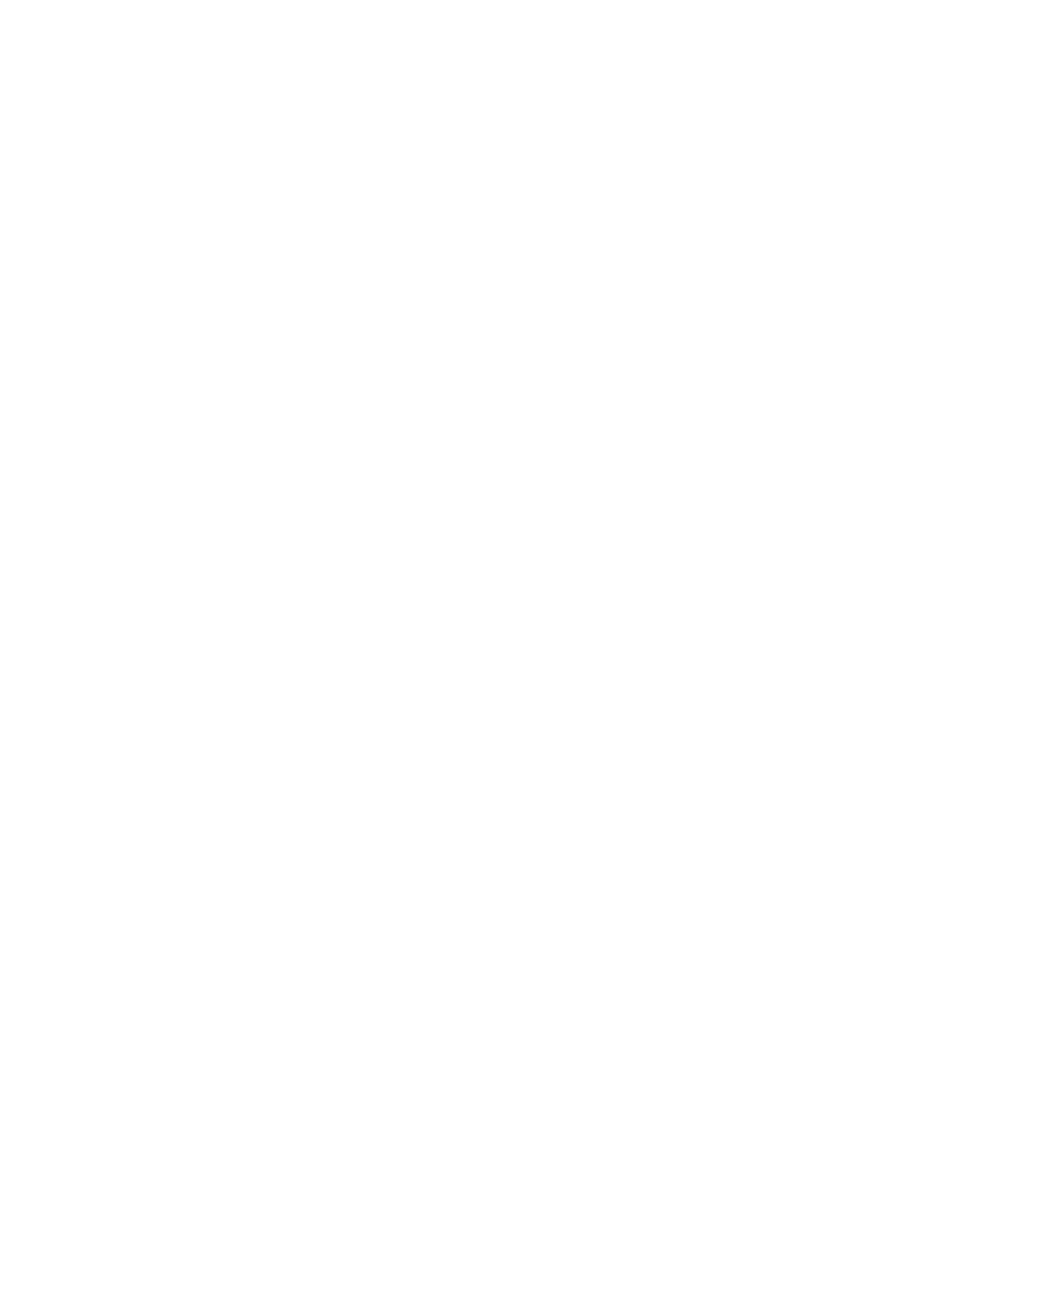

In [10]:
#### Demonstrates the difference between the original and limited resolution simulated images ####
#### Supplementary Fig 5 ####
%matplotlib notebook
fig = plt.figure(figsize=(5.2, 6.5))

# Sets the interpolation for all images.
inter = 'none'

# Simulation 1 - Limited Resolution
ax1 = plt.subplot2grid((5, 2), (0, 0), rowspan=2, colspan=1)
plt.imshow(res1[4:, 0:48],interpolation=inter,cmap='Greys')
plt.xticks([])
plt.yticks([])

# Simulation 1 - Original Resolution
ax2 = plt.subplot2grid((5, 2), (0, 1), rowspan=2, colspan=1)
plt.imshow(sim1[20:, 0:240], interpolation=inter,cmap='Greys')
plt.xticks([])
plt.yticks([])

# Simulation 2 - Limited Resolution
ax3 = plt.subplot2grid((5, 2), (2, 0), rowspan=1, colspan=1)
plt.imshow(res2[32:49, 0:48], interpolation =inter, cmap='Greys')
plt.xticks([])
plt.yticks([])

# Simulation 2 - Original Resolution
ax4 = plt.subplot2grid((5, 2), (2, 1), rowspan=1, colspan=1)
plt.imshow(sim2[160:245, 0:240], interpolation=inter, cmap='Greys')
plt.xticks([])
plt.yticks([])

# Simulation 3 - Limited Resolution
ax5 = plt.subplot2grid((5, 2), (3, 0), rowspan=1, colspan=1)
plt.imshow(res3[32:49, 0:48],interpolation=inter, cmap='Greys')
plt.xticks([])
plt.yticks([])

# Simulation 3 - Original Resolution
ax6 = plt.subplot2grid((5, 2), (3, 1), rowspan=1, colspan=1)
plt.imshow(sim3[160:245, 0:240],interpolation=inter, cmap='Greys')
plt.xticks([])
plt.yticks([])

# Simulation Cone - Limited Resolution
ax7 = plt.subplot2grid((5, 2), (4, 0), rowspan=1, colspan=1)
plt.imshow(res3[11:29, 0:48], interpolation=inter, cmap='Greys')
plt.xticks([])
plt.yticks([])

# Simulation Cone - Original Resolution
ax8 = plt.subplot2grid((5, 2), (4, 1), rowspan=1, colspan=1)
plt.imshow(sim3[55:145, 0:240], interpolation=inter, cmap='Greys')
plt.xticks([])
plt.yticks([])


plt.tight_layout()

plt.show()
# plt.savefig('Resolution_Compare.png',dpi=300)

# Figure 4 of Main Paper

<IPython.core.display.Javascript object>


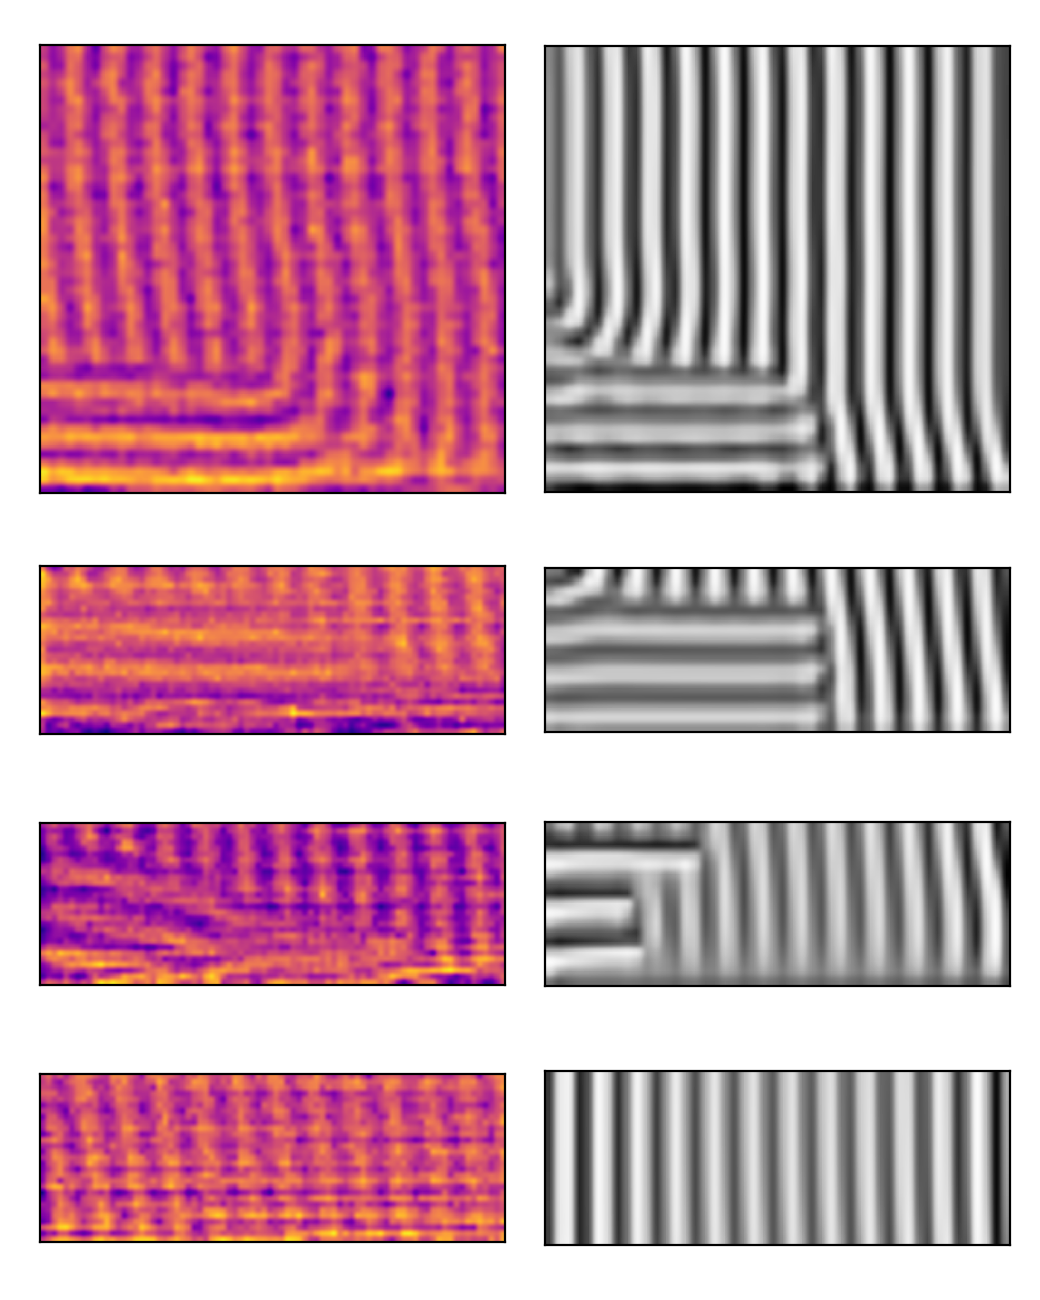

In [11]:
#### Plots Fig. 4 of Main Paper ####

########################################

%matplotlib notebook
fig = plt.figure(figsize=(5.2,6.5))

#Sets Gaussian blurring width
x = 0.5
# Sets interpolation method
inter = 'hamming'

################### Experimental Images #####################

### Panel 1 - Magnetic Image 1 ###        
ax1 = plt.subplot2grid((5, 2), (0, 0), rowspan=2, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(magnetic1[3:-12,3:-10],x),interpolation=inter, cmap = 'plasma_r')
plt.xticks([])
plt.yticks([])

### Panel 2 - Magnetic Image 2 ###        
ax2 = plt.subplot2grid((5, 2), (2, 0), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(magnetic2[3:-8,0:],x),interpolation=inter, cmap = 'plasma')
plt.xticks([])
plt.yticks([])

### Panel 3 - Magnetic Image 3 ###        
ax3 = plt.subplot2grid((5, 2), (3, 0), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(magnetic3[:-12,0:],x),interpolation=inter, cmap = 'plasma_r')
plt.xticks([])
plt.yticks([])

### Panel 4 - Magnetic Image 4 ###        
ax4 = plt.subplot2grid((5, 2), (4, 0), rowspan=1, colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(magnetic4[:-11,0:],x),interpolation=inter, cmap = 'plasma_r')
plt.xticks([])
plt.yticks([])


################### Limited Resolution Simulated Images #####################
# Sets interpolation method
inter = 'hamming'

### Panel 5 - Simulated Image 1 ###   
ax5 = plt.subplot2grid((5, 2), (0,1), rowspan=2, colspan=1)
plt.imshow(res1[4:,0:48],interpolation=inter, cmap='Greys')
plt.xticks([])
plt.yticks([])

### Panel 6 - Simulated Image 2 ###   
ax6 = plt.subplot2grid((5, 2), (2,1), rowspan=1, colspan=1)
plt.imshow(res2[32:49,0:48],interpolation=inter, cmap='Greys')
plt.xticks([])
plt.yticks([])

### Panel 7 - Simulated Image 3 ###   
ax7 = plt.subplot2grid((5, 2), (3,1), rowspan=1, colspan=1)
plt.imshow(res3[32:49,0:48],interpolation=inter, cmap='Greys')
plt.xticks([])
plt.yticks([])

### Panel 8 - Simulated Image Cone ###   
ax8 = plt.subplot2grid((5, 2), (4,1), rowspan=1, colspan=1)
plt.imshow(res3[11:29,0:48],interpolation=inter, cmap='Greys')
plt.xticks([])
plt.yticks([])


plt.tight_layout()
plt.show()
plt.savefig('Figure_5.png', dpi=300)
plt.savefig('Figure_5.pdf')